In [5]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import joblib
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, WhiteKernel, RBF,Matern
from sklearn.gaussian_process.kernels import ConstantKernel as C
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
import xlrd
import warnings

warnings.filterwarnings("ignore")
import shap
shap.initjs()

In [6]:
# 生成数据集
df_UTS = pd.read_excel("SLM_Ti6Al4V-YS-1.xlsx")
feature_name = [column for column in df_UTS][:]
scaler = StandardScaler()
scaler.fit(df_UTS)
df = scaler.transform(df_UTS)
X = df[:, 1:-1]
y = df[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=299)

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

def YS(X):
    cluster_centers = [([-0.48846264, -2.30697508, -0.55465694, 0.36368053, 0.55062878, -0.58399231,
                         3.90989886, 2.02018429]),
                       ([-0.07157402, 1.47778281, 0.39201436, 0.66536227, 1.8690567, -0.71297244,
                         0.34930012, -0.53299753]),
                       ([-0.16679138, 0.13063603, 0.76542495, 0.10729315, -0.02530694, 1.15082811,
                         -0.09163938, 0.51330978]),
                       ([0.22516516, -0.31973075, -0.7652522, -0.33253696, -0.5842466, -0.79217076,
                         -0.41942382, -0.52385686])]

    original_mean_X = [35.78651934, 80.24309392, 224.46961326, 926.40331492, 90.62983425,
                       41.85082873, 12.45226519, 23.85773481]
    original_mean_y = 1005.20005209
    original_std_X = [7.49600693, 14.19308521, 110.59919881, 362.19064573, 22.69254008,
                      16.01190379, 13.95310638, 9.97050877]
    original_std_y = 127.40710208262456
    predicts1 = []
    for to_predict in X:
        data= np.array([to_predict])
        cluster_distance = [np.sqrt(np.sum((data-value)**2, axis=1)) for value in cluster_centers]#样本到各个簇之间的距离
        cluster_index = np.argmin(cluster_distance)
        if cluster_index == 0:
            index2 = "0SVR"
        elif cluster_index == 1:
            index2 = "1GPR"
        elif cluster_index == 2:
            index2 = "2RFR"
        else:
            index2 = "3GPR"
        clf = joblib.load("YS_cluster_" + index2+ ".model")
        y_predict = (clf.predict(data)*original_std_y+original_mean_y)
        predicts1.append(y_predict)
    return np.array(predicts1)

In [8]:
# 创建SHAP解释器
explainer = shap.KernelExplainer(YS,X)
# 计算SHAP值
shap_values = explainer.shap_values(X)

Using 181 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/181 [00:00<?, ?it/s]

In [9]:
import pickle

# 假设您有一个名为shap_values的SHAP值列表
with open('shap_values_All_YS.pkl', 'wb') as f:
    pickle.dump(shap_values, f)


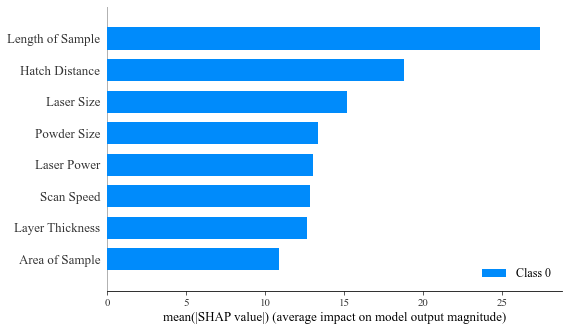

In [10]:
feature_names = ["Powder Size", "Laser Size", "Laser Power", "Scan Speed","Hatch Distance","Layer Thickness","Length of Sample","Area of Sample"]
shap.summary_plot(shap_values, X,feature_names = feature_names)

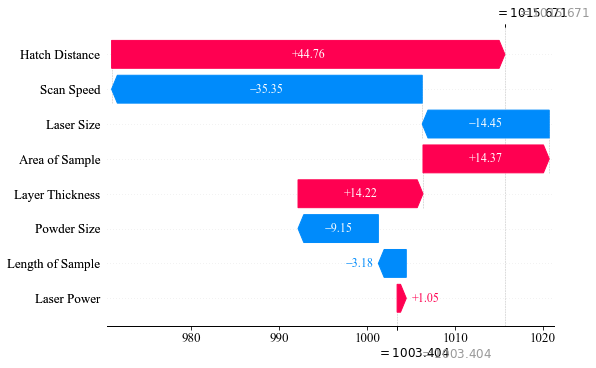

In [11]:
# 使用 waterfall_plot 函数绘制图形
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0],shap_values[0][0],feature_names = feature_names)

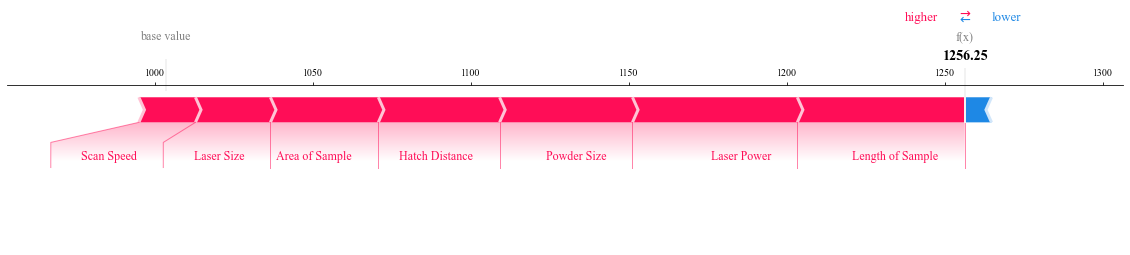

In [12]:
feature_names = ["Powder Size", "Laser Size", "Laser Power", "Scan Speed","Hatch Distance","Layer Thickness","Length of Sample","Area of Sample"]

shap.force_plot(explainer.expected_value,shap_values[0][36], show=False, matplotlib=True, feature_names = feature_names)
plt.show()

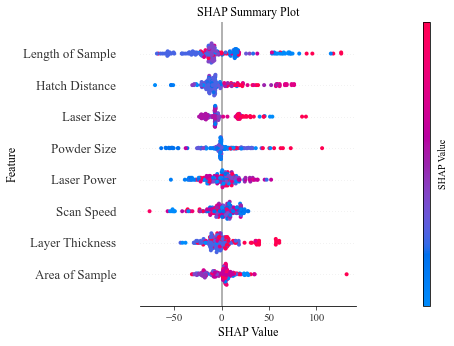

In [13]:
feature_names = ["Powder Size", "Laser Size", "Laser Power", "Scan Speed","Hatch Distance","Layer Thickness","Length of Sample","Area of Sample"]

# 导入相关包
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 设置图形大小
plt.figure(figsize=(40, 32))

# 设置字体样式
plt.rcParams["font.family"] = "Times New Roman" # 设置字体为 Times New Roman
prop = fm.FontProperties(fname="C:/Windows/Fonts/times.ttf") # 指定字体文件路径

# 假设你已经计算好了 shap_values 和 feature_names 数组，可以修改以下行代码

shap.summary_plot(shap_values[0], X, feature_names=feature_names, show=False, color_bar=False)

# 设置特定文本元素的字体属性
plt.title("SHAP Summary Plot", fontproperties=prop, fontsize=16)
plt.xlabel("SHAP Value", fontproperties=prop, fontsize=12)
plt.ylabel("Feature Value", fontproperties=prop, fontsize=12)

# 添加颜色图例
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cbar = plt.colorbar(ticks=[-3, 3], label="SHAP Value", aspect=40, orientation="vertical", pad=0.2)
cbar.ax.set_yticklabels(['Low', 'High'])

# 设置特定文本元素的字体属性
plt.title("SHAP Summary Plot")
plt.xlabel("SHAP Value")
plt.ylabel("Feature")

# 调整子图布局，使颜色条不覆盖子图
plt.subplots_adjust(right=0.8)


# 显示图表
plt.show()
